<a href="https://colab.research.google.com/github/nikithamedehal/binary_search/blob/master/wind_power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install chart_studio
!pip install windrose
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from windrose import WindroseAxes
import os
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
dataset = pd.read_csv('/T1.csv', header= 0,
                        encoding= 'unicode_escape')
dataset.head()

,ï»¿Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (Â°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [7]:
turbine_no="T1"

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ï»¿Date/Time                   50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (Â°)            50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [9]:
data1_T=dataset.copy()

In [16]:
data1_T.rename(columns={"ï»¿Date/Time": "Date/Time", "LV ActivePower (kW)":"ActivePower(kW)","Wind Speed (m/s)":"WindSpeed(m/s)","Wind Direction (°)":"Wind_Direction"},
                inplace=True)
data1_T.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind Direction (Â°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [17]:
data1_T.rename(columns={'Date/Time':'Time'},inplace=True)
data1_T.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind Direction (Â°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [18]:
def find_month(x):
    if " 01 " in x:
        return "Jan"
    elif " 02 " in x:
        return "Feb"
    elif " 03 " in x:
        return "March"    
    elif " 04 " in x:
        return "April"    
    elif " 05 " in x:
        return "May"    
    elif " 06 " in x:
        return "June"    
    elif " 07 " in x:
        return "July"    
    elif " 08 " in x:
        return "August"    
    elif " 09 " in x:
        return "Sep"    
    elif " 10 " in x:
        return "Oct"    
    elif " 11 " in x:
        return "Nov"    
    else:
        return "Dec"    

In [19]:
#add months
data1_T['Month']=data1_T.Time.apply(find_month)
data1_T.Month.unique()
data1_T.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind Direction (Â°),Month
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan


In [22]:
#function for rewriting wind speed for 0.5 intervals. 
#For example: wind speeds between 3.25 and 3.75 turns 3.5,wind speeds between 3.75 and 4.25 turns 4.0
def mean_speed(x):
    list=[]
    i=0.25
    while i<=25.5:
        list.append(i)
        i+=0.5
        
    for i in list:
        if x < i:
            x=i-0.25
            return x
#adding a new column as "mean_WindSpeed" with function mean_speed().
data1_T["mean_WindSpeed"]=data1_T["WindSpeed(m/s)"].apply(mean_speed)
data1_T.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind Direction (Â°),Month,mean_WindSpeed
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5


In [23]:
#function for rewriting wind direction for 30 intervals. 
#For example: wind directions between 15 and 45 turns 30,wind speeds between 45 and 75 turns 60
def mean_direction(x):
    list=[]
    i=15
    while i<=375:
        list.append(i)
        i+=30
        
    for i in list:
        if x < i:
            x=i-15
            if x==360:
                return 0
            else:
                return x
#adding a new column as "mean_Direction" with function mean_direction().
data1_T["mean_Direction"]=data1_T["Wind Direction (Â°)"].apply(mean_direction)
data1_T.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind Direction (Â°),Month,mean_WindSpeed,mean_Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270


In [24]:
#function for rewriting wind direction with letters. 
#For example: 0=N, 30=NNE 60=NEE etc.
def find_direction(x):
    if x==0:
        return "N"
    if x==30:
        return "NNE"
    if x==60:
        return "NEE" 
    if x==90:
        return "E" 
    if x==120:
        return "SEE" 
    if x==150:
        return "SSE" 
    if x==180:
        return "S" 
    if x==210:
        return "SSW" 
    if x==240:
        return "SWW" 
    if x==270:
        return "W" 
    if x==300:
        return "NWW" 
    if x==330:
        return "NNW"
  
#adding a new column as "Direction" with function find_direction().
data1_T["Direction"]=data1_T["mean_Direction"].apply(find_direction)
data1_T.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind Direction (Â°),Month,mean_WindSpeed,mean_Direction,Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270,W
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270,W
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270,W
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270,W
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270,W


In [26]:
#Number of wind speed values between 3.5 and 25. 
len(data1_T["WindSpeed(m/s)"][(data1_T["WindSpeed(m/s)"]>3.5) & (data1_T["WindSpeed(m/s)"]<=25)])

40634

In [27]:
#Values bigger than 25. 
data1_T["WindSpeed(m/s)"][data1_T["WindSpeed(m/s)"]>25].value_counts()

25.206011    1
Name: WindSpeed(m/s), dtype: int64

In [28]:
#Remove the data that wind speed is smaller than 3.5 and bigger than 25.5
#We do that because according to turbine power curve turbine works between these values.
data2_T=data1_T[(data1_T["WindSpeed(m/s)"]>3.5) & (data1_T["WindSpeed(m/s)"]<=25.5)]

In [29]:
#Number of values where wind speed is bigger than 3.5 and active power is zero. 
#If wind speed is bigger than 3.5 and active power is zero, this means turbine is out of order. we must eliminate these.
len(data2_T["ActivePower(kW)"][(data2_T["ActivePower(kW)"]==0)&(data2_T["WindSpeed(m/s)"]>3.5)])

2217

In [30]:
#Eliminate datas where wind speed is bigger than 3.5 and active power is zero.
data3_T=data2_T[((data2_T["ActivePower(kW)"]!=0)&(data2_T["WindSpeed(m/s)"]>3.5)) | (data2_T["WindSpeed(m/s)"]<=3.5)]

In [31]:
#Number of values
len(data3_T["WindSpeed(m/s)"])

38418

In [32]:
data3_T.head(10)

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind Direction (Â°),Month,mean_WindSpeed,mean_Direction,Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270,W
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270,W
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270,W
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270,W
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270,W
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,Jan,5.5,270,W
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605,Jan,6.0,270,W
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493,Jan,5.5,270,W
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698,Jan,5.5,240,SWW
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785,Jan,5.5,270,W


In [33]:
#the mean value of Nordex_Powercurve(kW) when mean_WindSpeed is 5.5
data3_T["Theoretical_Power_Curve (KWh)"][data3_T["mean_WindSpeed"]==5.5].mean()

472.09575192642797

In [34]:
#we create clean data and add a columns where calculating losses. 
#Loss is difference between the Nordex_Powercurve and ActivePower. 
data_T_clean=data3_T.sort_values("Time")
data_T_clean["Loss_Value(kW)"]=data_T_clean["Theoretical_Power_Curve (KWh)"]-data_T_clean["ActivePower(kW)"]
data_T_clean["Loss(%)"]=data_T_clean["Loss_Value(kW)"]/data_T_clean["Theoretical_Power_Curve (KWh)"]*100
#round the values to 2 digit.
data_T_clean=data_T_clean.round({'ActivePower(kW)': 2, 'WindSpeed(m/s)': 2, 'Theoretical_Power_Curve (KWh)': 2,
                                   'Wind_Direction': 2, 'Loss_Value(kW)': 2, 'Loss(%)': 2})

data_T_clean.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind Direction (Â°),Month,mean_WindSpeed,mean_Direction,Direction,Loss_Value(kW),Loss(%)
0,01 01 2018 00:00,380.05,5.31,416.33,259.994904,Jan,5.5,270,W,36.28,8.71
1,01 01 2018 00:10,453.77,5.67,519.92,268.641113,Jan,5.5,270,W,66.15,12.72
2,01 01 2018 00:20,306.38,5.22,390.90,272.564789,Jan,5.0,270,W,84.52,21.62
3,01 01 2018 00:30,419.65,5.66,516.13,271.258087,Jan,5.5,270,W,96.48,18.69
4,01 01 2018 00:40,380.65,5.58,491.70,265.674286,Jan,5.5,270,W,111.05,22.59


In [36]:
#creating summary speed dataframe from clean data.
DepGroupT_speed = data_T_clean.groupby("mean_WindSpeed")
data_T_speed=DepGroupT_speed.mean()
#removing the unnecessary columns.
data_T_speed.drop(columns={"WindSpeed(m/s)","Wind Direction (Â°)","mean_Direction"},inplace=True)
#creating a windspeed column from index values.
listTspeed_WS=data_T_speed.index.copy()
data_T_speed["WindSpeed(m/s)"]=listTspeed_WS
#changing the place of columns.
data_T_speed=data_T_speed[["WindSpeed(m/s)","ActivePower(kW)","Theoretical_Power_Curve (KWh)","Loss_Value(kW)","Loss(%)"]]
#changing the index numbers.
data_T_speed["Index"]=list(range(1,len(data_T_speed.index)+1))
data_T_speed.set_index("Index",inplace=True)
#rounding the values to 2 digit
data_T_speed=data_T_speed.round({"WindSpeed(m/s)": 1, 'ActivePower(kW)': 2, 'Theoretical_Power_Curve (KWh)': 2, 'Loss_Value(kW)': 2, 'Loss(%)': 2})
#creating a count column that shows the number of wind speed from clean data.
data_T_speed["count"]=[len(data_T_clean["mean_WindSpeed"][data_T_clean["mean_WindSpeed"]==i]) 
                        for i in data_T_speed["WindSpeed(m/s)"]]

<ipython-input-36-226af88fd679>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_T_speed=DepGroupT_speed.mean()


In [37]:
data_T_speed

,WindSpeed(m/s),ActivePower(kW),Theoretical_Power_Curve (KWh),Loss_Value(kW),Loss(%),count
Index,,,,,,
1,3.5,51.68,68.61,16.94,24.14,675
2,4.0,98.33,127.75,29.42,23.26,1736
3,4.5,183.96,222.48,38.52,17.44,1794
4,5.0,285.47,336.32,50.86,15.24,1725
5,5.5,402.30,472.10,69.80,14.84,2012
6,6.0,546.76,627.10,80.34,12.84,2216
7,6.5,713.07,807.67,94.60,11.76,2274
8,7.0,902.86,1015.80,112.94,11.16,2320
9,7.5,1122.43,1256.94,134.51,10.72,2254


In [40]:
#create summary direction dataframe from clean data.
DepGroupT_direction = data_T_clean.groupby("Direction")
data_T_direction=DepGroupT_direction.mean()
#remove the unnecessary columns.
data_T_direction.drop(columns={"WindSpeed(m/s)","Wind Direction (Â°)"},inplace=True)
#create a column from index.
listTdirection_Dir=data_T_direction.index.copy()
data_T_direction["Direction"]=listTdirection_Dir
#change the name of mean_WindSpeed column as  WindSpeed.
data_T_direction["WindSpeed(m/s)"]=data_T_direction["mean_WindSpeed"]
data_T_direction.drop(columns={"mean_WindSpeed"},inplace=True)
#change the place of columns.
data_T_direction=data_T_direction[["Direction","mean_Direction","ActivePower(kW)","Theoretical_Power_Curve (KWh)","WindSpeed(m/s)",
                                     "Loss_Value(kW)","Loss(%)"]]
#change the index numbers.
data_T_direction["Index"]=list(range(1,len(data_T_direction.index)+1))
data_T_direction.set_index("Index",inplace=True)
#create a count column that shows the number of directions from clean data.
data_T_direction["count"]=[len(data_T_clean["Direction"][data_T_clean["Direction"]==i]) 
                        for i in data_T_direction["Direction"]]
#round the values to 2 digit
data_T_direction=data_T_direction.round({'WindSpeed(m/s)': 1,'ActivePower(kW)': 2, 'Theoretical_Power_Curve (KWh)': 2,
                                           'Loss_Value(kW)': 2, 'Loss(%)': 2})
#sort by mean_Direction
data_T_direction=data_T_direction.sort_values("mean_Direction")
data_T_direction.drop(columns={"mean_Direction"},inplace=True)

<ipython-input-40-9b9699bd83f5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_T_direction=DepGroupT_direction.mean()


In [41]:
data_T_direction

,Direction,ActivePower(kW),Theoretical_Power_Curve (KWh),WindSpeed(m/s),Loss_Value(kW),Loss(%),count
Index,,,,,,,
2,N,1171.54,1383.10,7.4,211.56,17.91,1294
4,NNE,1511.73,1739.18,8.4,227.45,13.76,7533
3,NEE,1773.33,1969.08,8.8,195.75,13.02,13042
1,E,1209.27,1345.86,7.4,136.59,3.68,2088
8,SEE,579.82,631.63,5.6,51.80,7.88,485
9,SSE,912.14,1047.23,6.7,135.09,16.16,511
7,S,2409.73,2517.83,11.7,108.10,6.82,3710
10,SSW,2300.71,2439.50,10.9,138.79,8.12,6119
11,SWW,1252.60,1359.33,7.4,106.73,11.59,1663


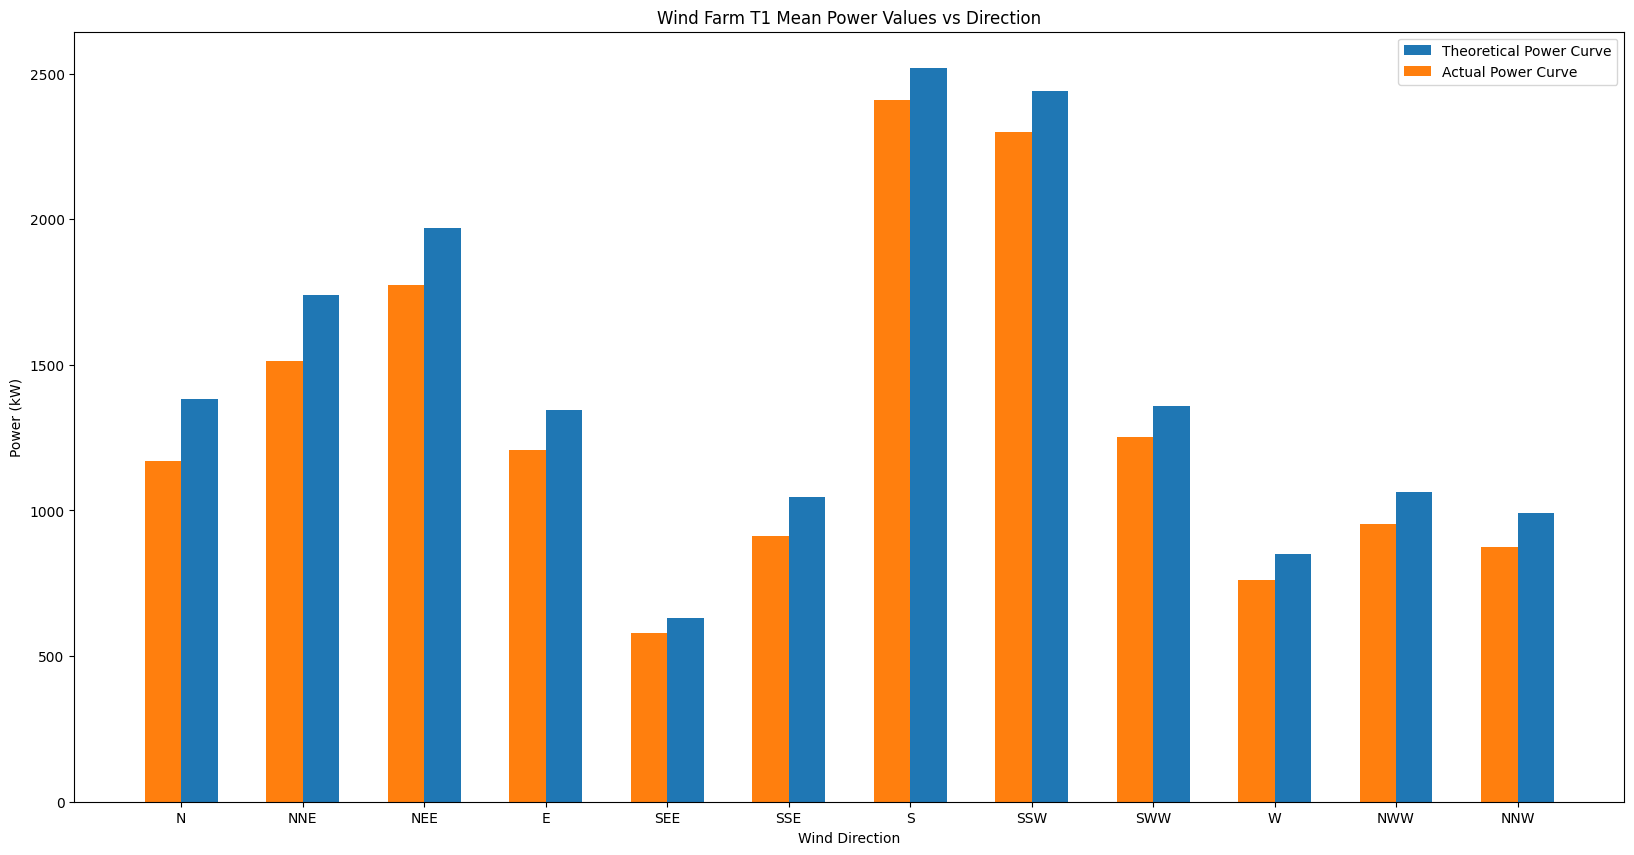

In [42]:
#Drawing graph of mean powers according to wind direction.
def bar_graph():
    fig = plt.figure(figsize=(20,10))
    plt.bar(data_T_direction["Direction"],data_T_direction["Theoretical_Power_Curve (KWh)"],label="Theoretical Power Curve",align="edge",width=0.3)
    plt.bar(data_T_direction["Direction"],data_T_direction["ActivePower(kW)"],label="Actual Power Curve",align="edge",width=-0.3)
    plt.xlabel("Wind Direction")
    plt.ylabel("Power (kW)")
    plt.title("Wind Farm {} Mean Power Values vs Direction".format(turbine_no))
    plt.legend()
    plt.show()
bar_graph()

In [43]:
#creating summary direction total dataframe from direction data.
data_T_direction_total=data_T_direction.copy()
#removing the unnecessary columns.
data_T_direction_total.drop(columns={"count","ActivePower(kW)","Theoretical_Power_Curve (KWh)","Loss_Value(kW)","Loss(%)"},inplace=True)
#calculating the total values from direction data.
data_T_direction_total["Total_Generation(MWh)"]=data_T_direction["ActivePower(kW)"]*data_T_direction["count"]/6000
data_T_direction_total["Theoretical_PC_Total_Generation(MWh)"]=data_T_direction["Theoretical_Power_Curve (KWh)"]*data_T_direction["count"]/6000
data_T_direction_total["Total_Loss(MWh)"]=data_T_direction_total["Theoretical_PC_Total_Generation(MWh)"]-data_T_direction_total["Total_Generation(MWh)"]
data_T_direction_total["Loss(%)"]=data_T_direction_total["Total_Loss(MWh)"]/data_T_direction_total["Theoretical_PC_Total_Generation(MWh)"]*100
#rounding the values to 2 digit
data_T_direction_total=data_T_direction_total.round({'WindSpeed(m/s)': 1,'Total_Generation(MWh)': 2, 'Theoretical_PC_Total_Generation(MWh)': 2,
                                           'Total_Loss(MWh)': 2, 'Loss(%)': 2})
#changing the place of columns.
data_T_direction_total=data_T_direction_total[["Direction","Total_Generation(MWh)","Theoretical_PC_Total_Generation(MWh)","WindSpeed(m/s)",
                                     "Total_Loss(MWh)","Loss(%)"]]

In [44]:
data_T_direction_total

,Direction,Total_Generation(MWh),Theoretical_PC_Total_Generation(MWh),WindSpeed(m/s),Total_Loss(MWh),Loss(%)
Index,,,,,,
2,N,252.66,298.29,7.4,45.63,15.30
4,NNE,1897.98,2183.54,8.4,285.56,13.08
3,NEE,3854.63,4280.12,8.8,425.50,9.94
1,E,420.83,468.36,7.4,47.53,10.15
8,SEE,46.87,51.06,5.6,4.19,8.20
9,SSE,77.68,89.19,6.7,11.51,12.90
7,S,1490.02,1556.86,11.7,66.84,4.29
10,SSW,2346.34,2487.88,10.9,141.54,5.69
11,SWW,347.18,376.76,7.4,29.58,7.85


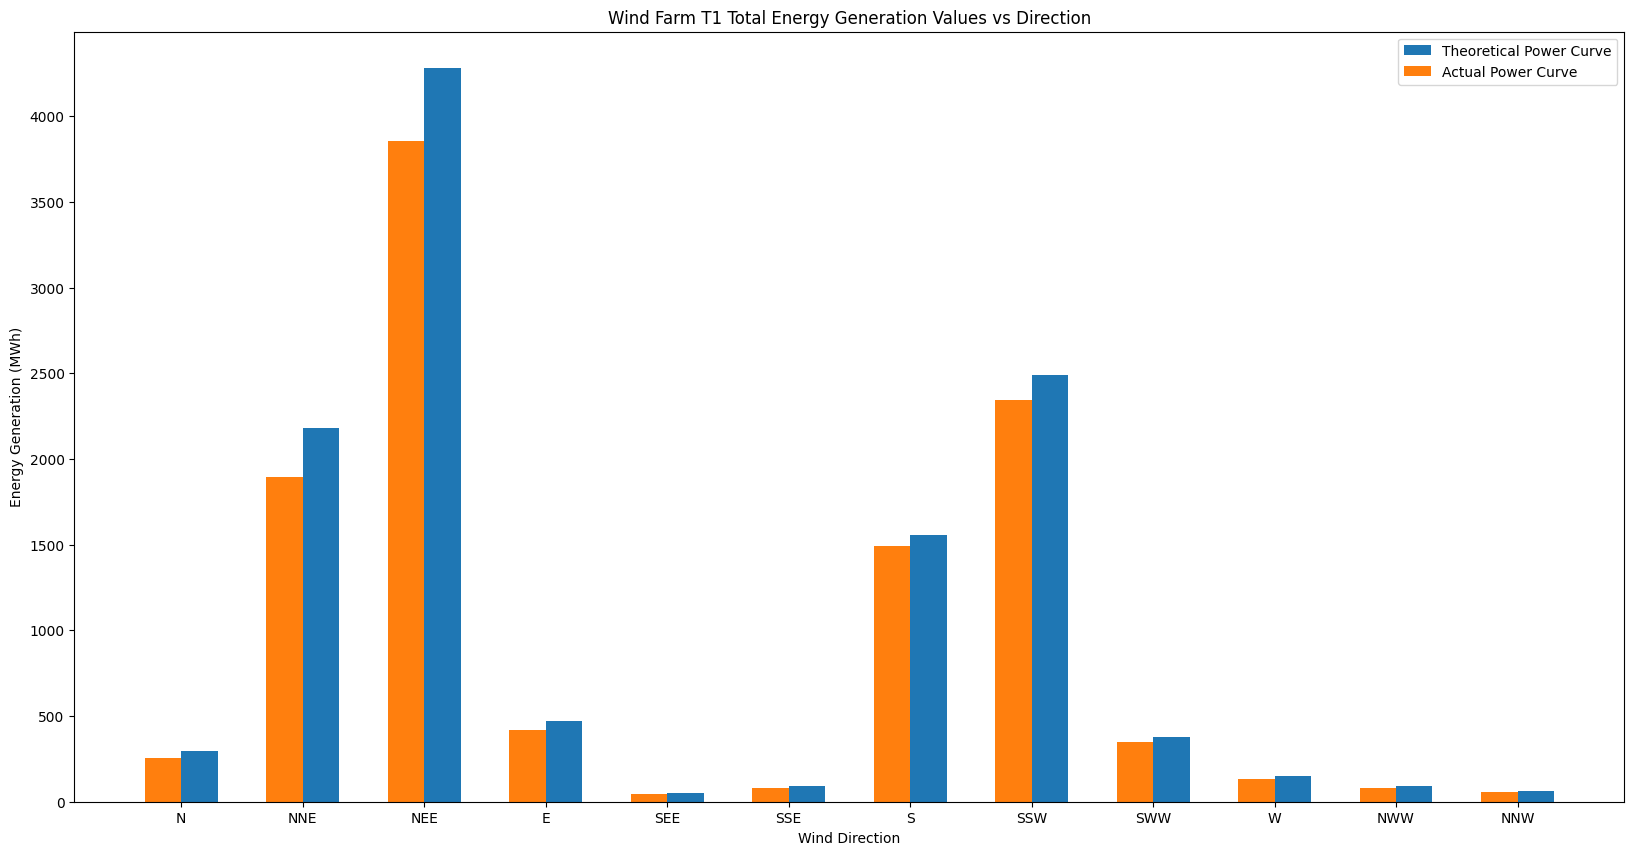

In [45]:
#Drawing graph of total generations according to wind direction.
def bar_graph():
    fig = plt.figure(figsize=(20,10))
    plt.bar(data_T_direction_total["Direction"],data_T_direction_total["Theoretical_PC_Total_Generation(MWh)"],label="Theoretical Power Curve",align="edge",width=0.3)
    plt.bar(data_T_direction_total["Direction"],data_T_direction_total["Total_Generation(MWh)"],label="Actual Power Curve",align="edge",width=-0.3)
    plt.xlabel("Wind Direction")
    plt.ylabel("Energy Generation (MWh)")
    plt.title("Wind Farm {} Total Energy Generation Values vs Direction".format(turbine_no))
    plt.legend()
    plt.show()
bar_graph()

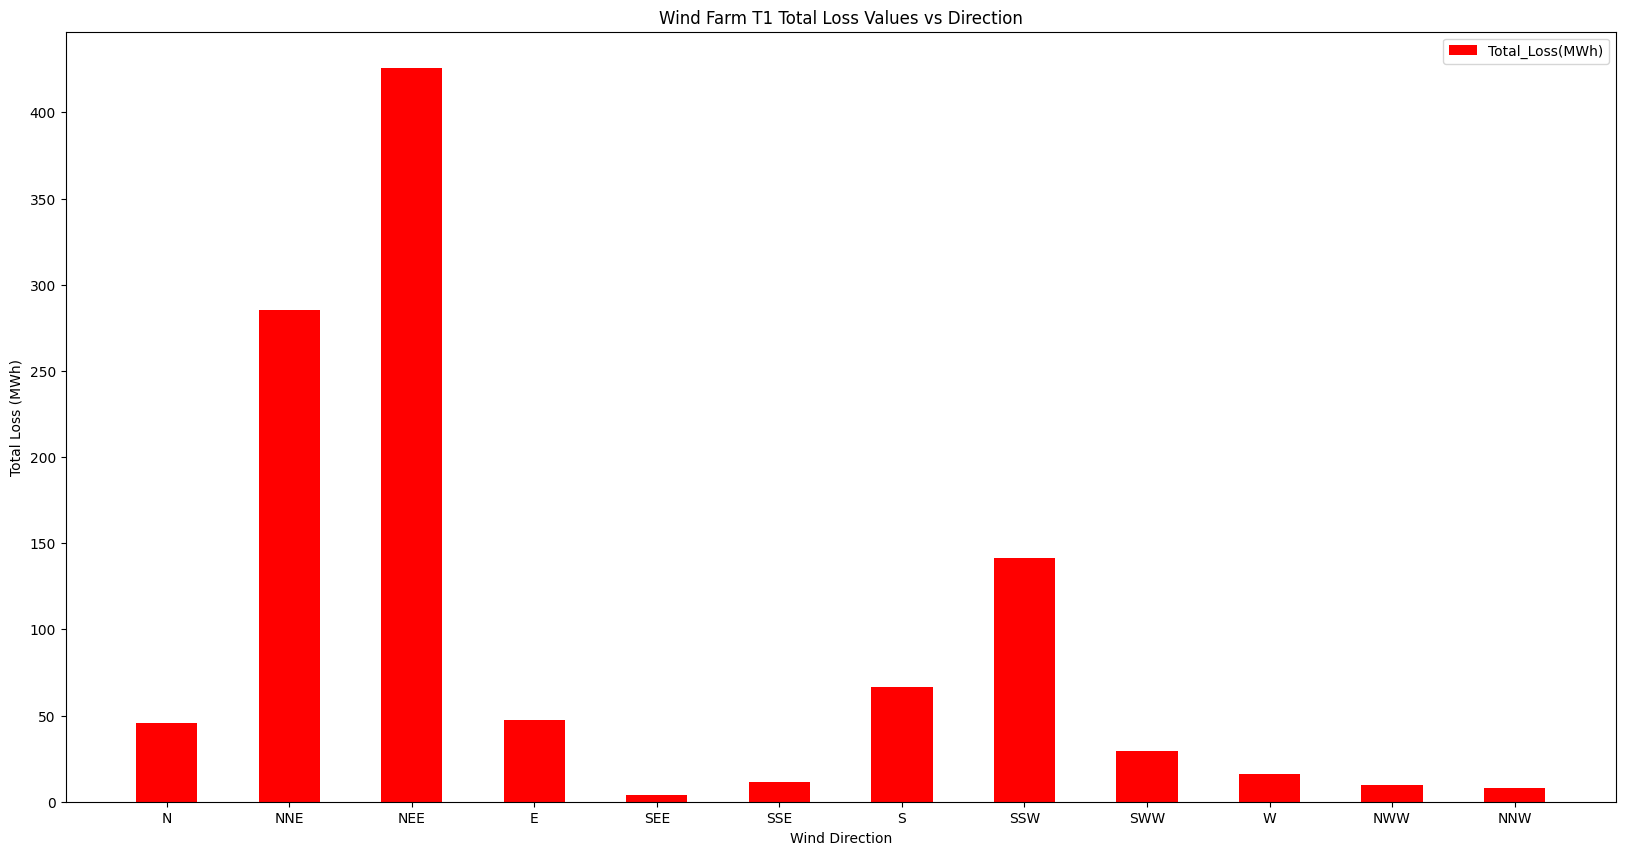

In [46]:
#Drawing graph of total loss according to wind direction.
def bar_graph():
    fig = plt.figure(figsize=(20,10))
    plt.bar(data_T_direction_total["Direction"],data_T_direction_total["Total_Loss(MWh)"],
            label="Total_Loss(MWh)",align="center",width=0.5, color="red",picker=5)
    plt.xlabel("Wind Direction")
    plt.ylabel("Total Loss (MWh)")
    plt.title("Wind Farm {} Total Loss Values vs Direction".format(turbine_no))
    plt.legend()
    plt.show()
bar_graph()

In [49]:
#creating summary dataframes for all directions from clean data in a for loop as we did when creating direction dataframe.
list_data=[]
list_yon=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]
for i in range(0,12):
    data1T_A=data_T_clean[data_T_clean["Direction"]==list_yon[i]]
    #
    DepGroup_A = data1T_A.groupby("mean_WindSpeed")
    data_T_A=DepGroup_A.mean()
    #
    data_T_A.drop(columns={"WindSpeed(m/s)","Wind Direction (Â°)","mean_Direction"},inplace=True)
    #
    listTA_WS=data_T_A.index.copy()
    data_T_A["WindSpeed(m/s)"]=listTA_WS
    #
    data_T_A=data_T_A[["WindSpeed(m/s)","ActivePower(kW)","Theoretical_Power_Curve (KWh)","Loss_Value(kW)","Loss(%)"]]
    #
    data_T_A["Index"]=list(range(1,len(data_T_A.index)+1))
    data_T_A.set_index("Index",inplace=True)
    #
    data_T_A=data_T_A.round({'ActivePower(kW)': 2, 'Theoretical_Power_Curve (KWh)': 2, 'Loss_Value(kW)': 2, 'Loss(%)': 2})
    #
    data_T_A["count"]=[len(data1T_A["mean_WindSpeed"][data1T_A["mean_WindSpeed"]==x]) 
                            for x in data_T_A["WindSpeed(m/s)"]]
    list_data.append(data_T_A)
    
data_T_N=list_data[0]
data_T_NNE=list_data[1]
data_T_NEE=list_data[2]
data_T_E=list_data[3]
data_T_SEE=list_data[4]
data_T_SSE=list_data[5]
data_T_S=list_data[6]
data_T_SSW=list_data[7]
data_T_SWW=list_data[8]
data_T_W=list_data[9]
data_T_NWW=list_data[10]
data_T_NNW=list_data[11]

<ipython-input-49-c4a34cbd0e4e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_T_A=DepGroup_A.mean()
<ipython-input-49-c4a34cbd0e4e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_T_A=DepGroup_A.mean()
<ipython-input-49-c4a34cbd0e4e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_T_A["Index"]=list(range(1,len(data_T_A.index)+1))
<ipython-input-49

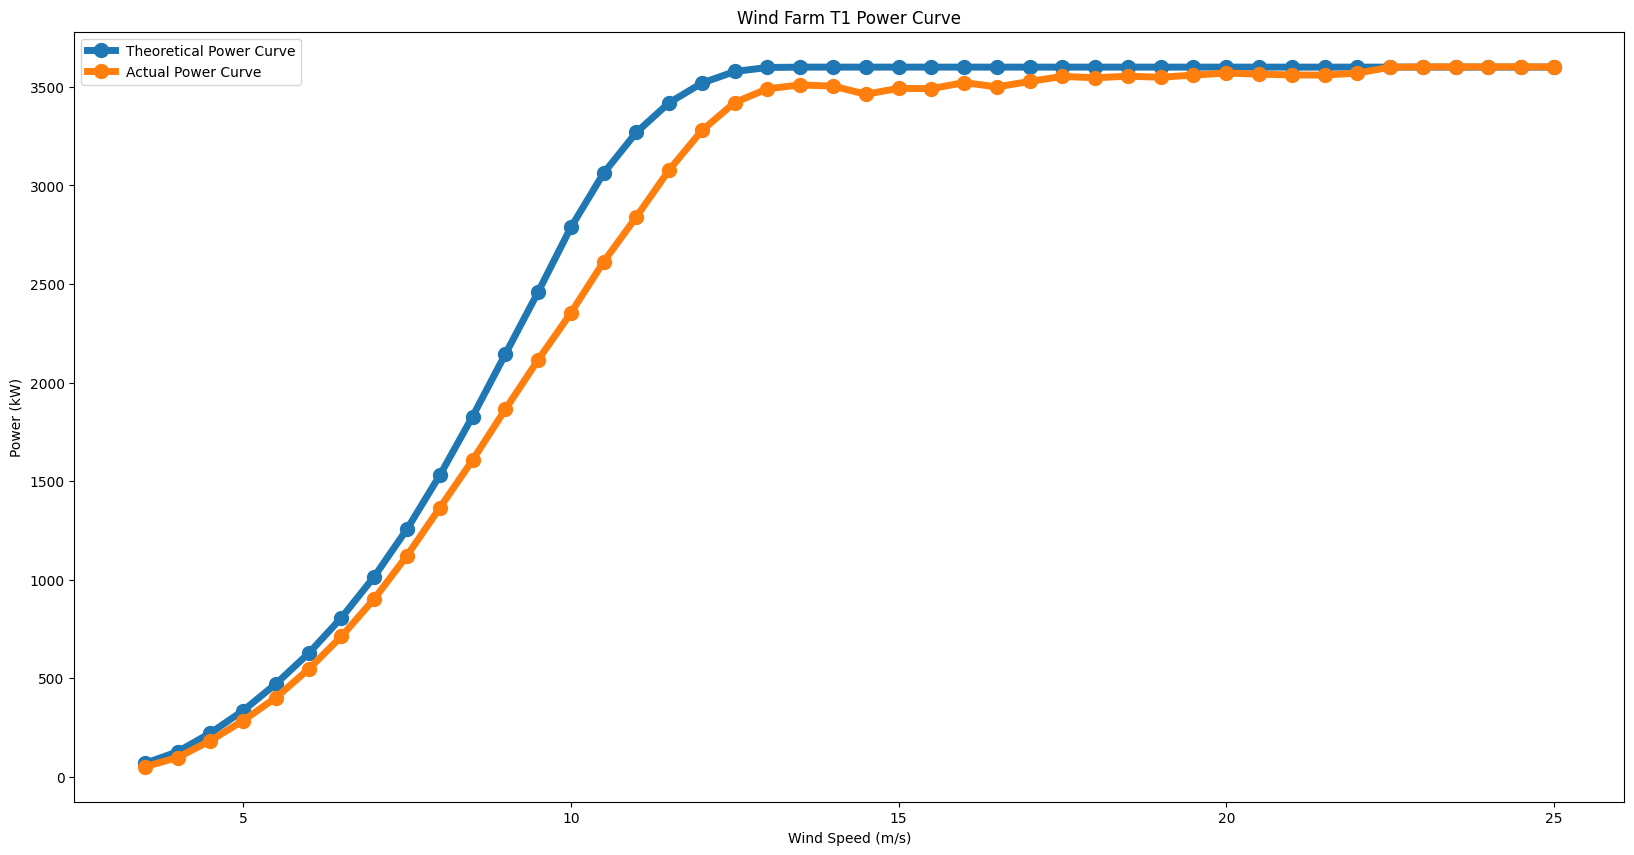

In [50]:
#Drawing power curve of the turbine.
def graph_WT():
    fig = plt.figure(figsize=(20,10))
    plt.plot(data_T_speed["WindSpeed(m/s)"],data_T_speed["Theoretical_Power_Curve (KWh)"],label="Theoretical Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.plot(data_T_speed["WindSpeed(m/s)"],data_T_speed["ActivePower(kW)"],label="Actual Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.xlabel("Wind Speed (m/s)")
    plt.ylabel("Power (kW)")
    plt.title("Wind Farm {} Power Curve".format(turbine_no))
    plt.legend()
    plt.show()
    fig.savefig("{}_Powercurve.png".format(turbine_no))
    plt.close(fig)
        
graph_WT()

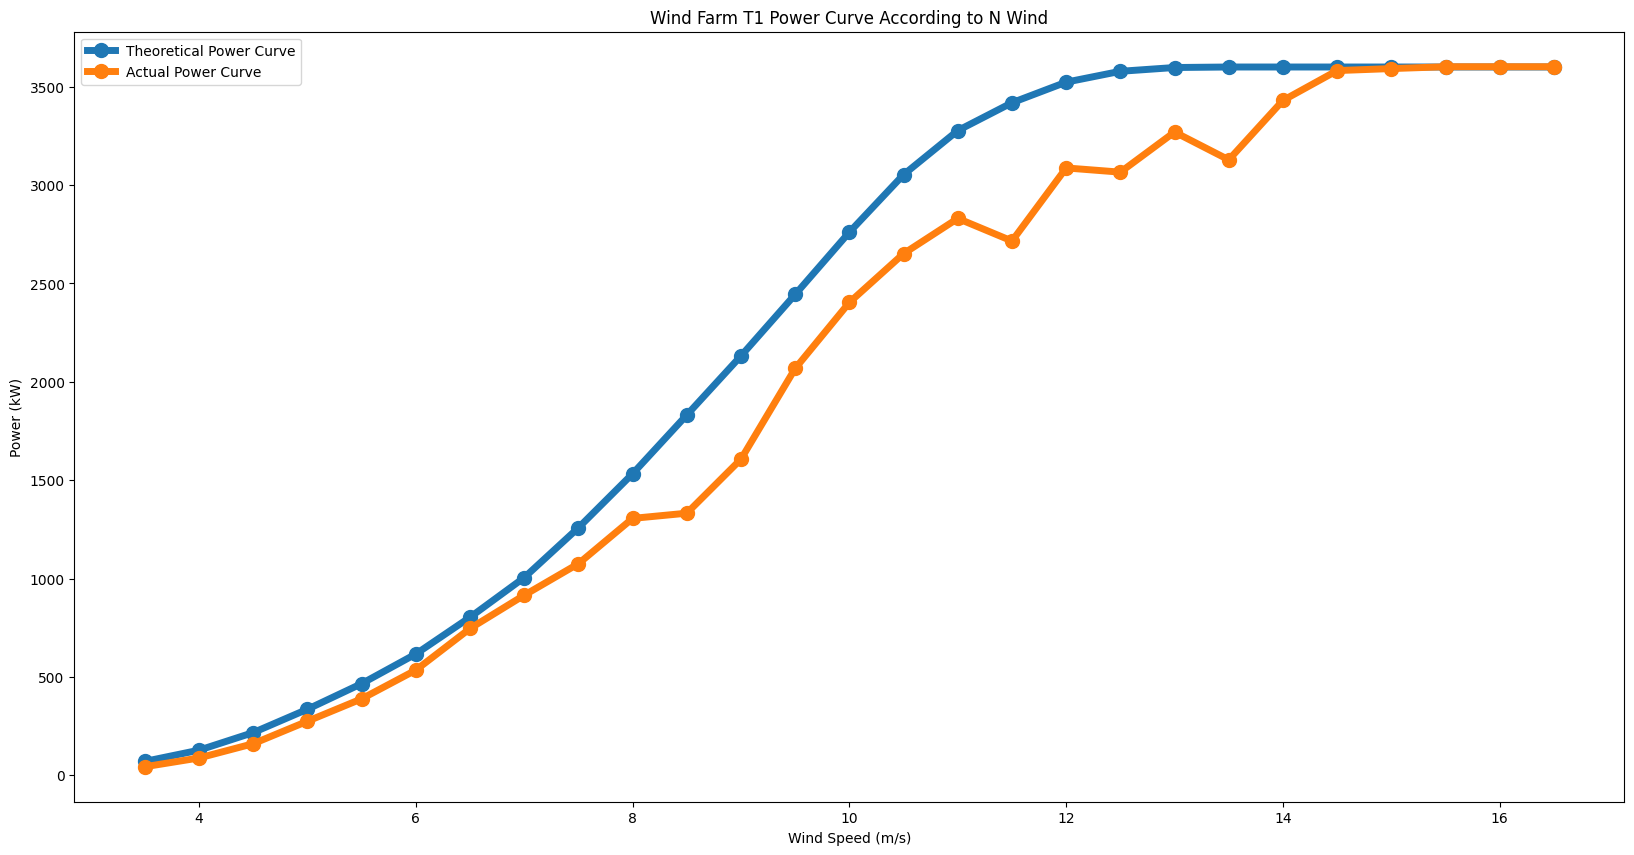

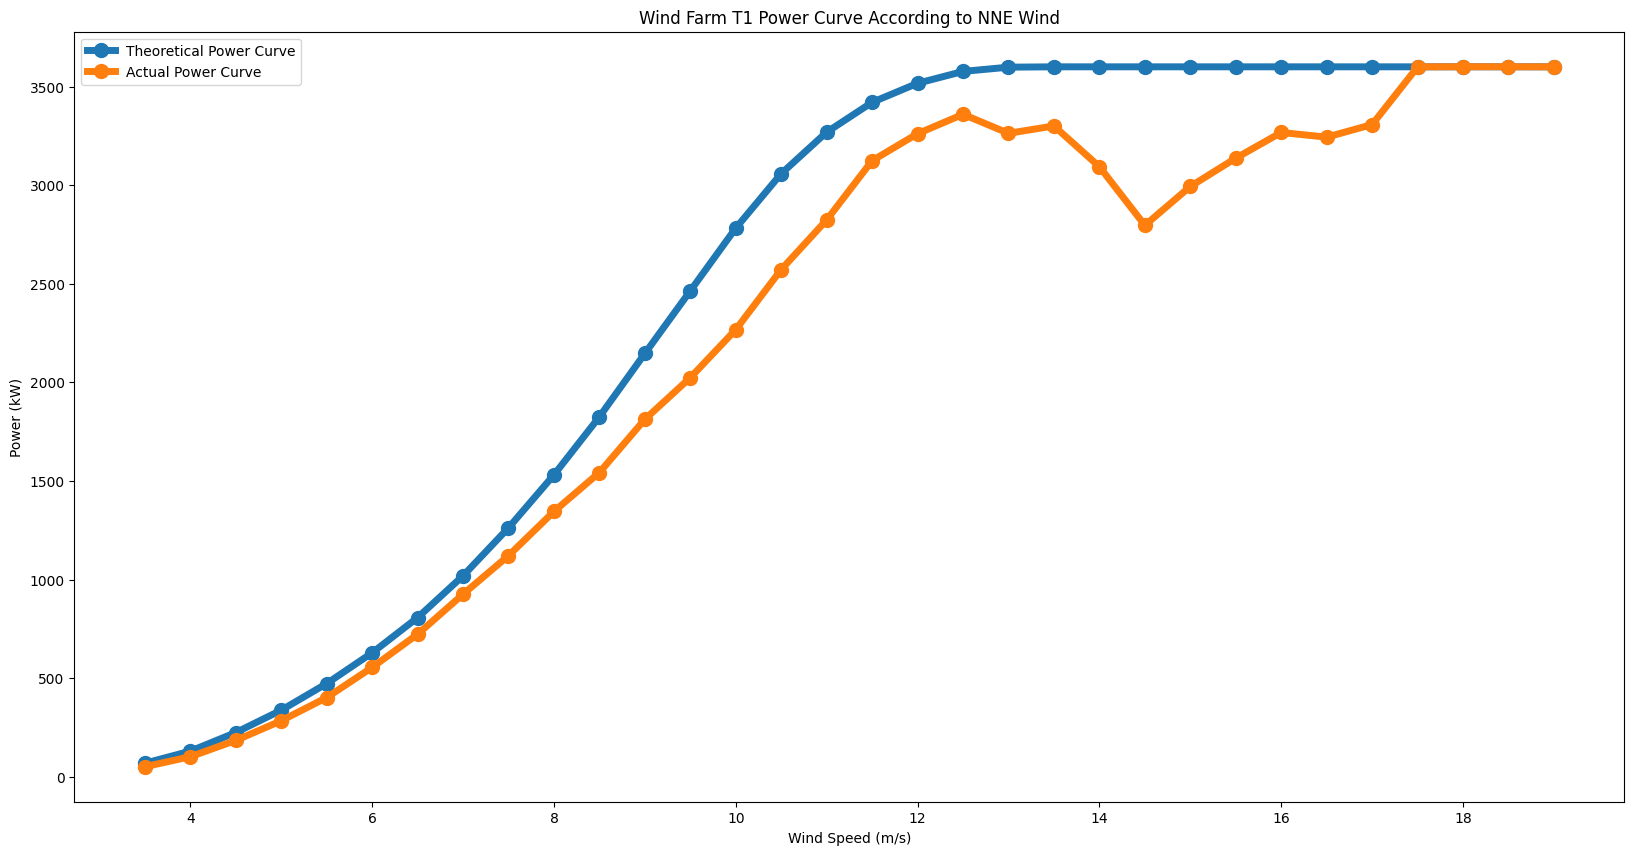

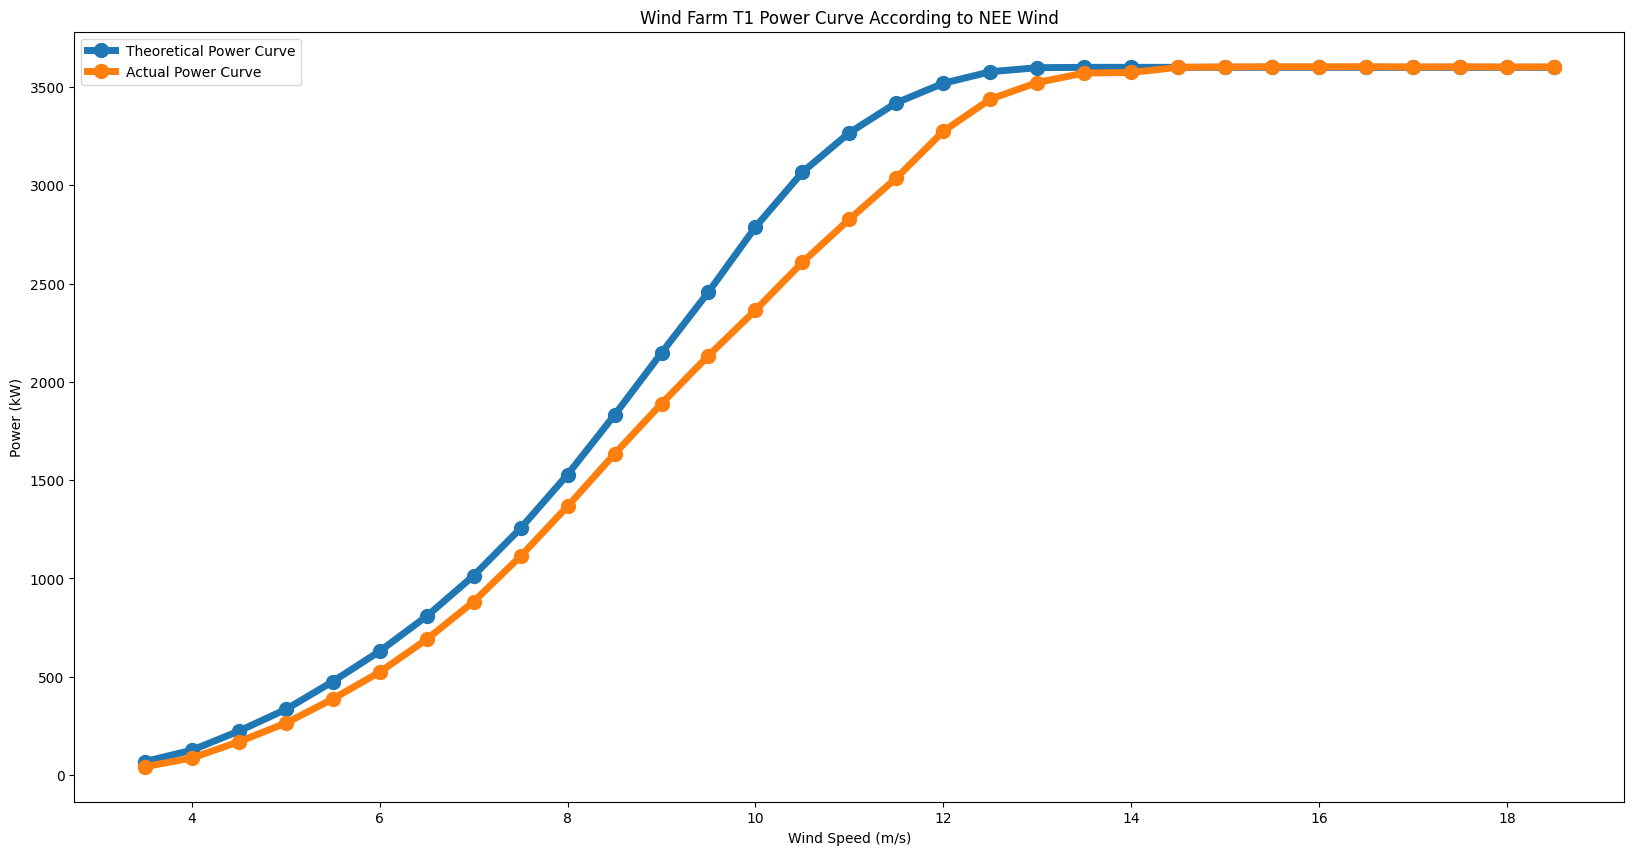

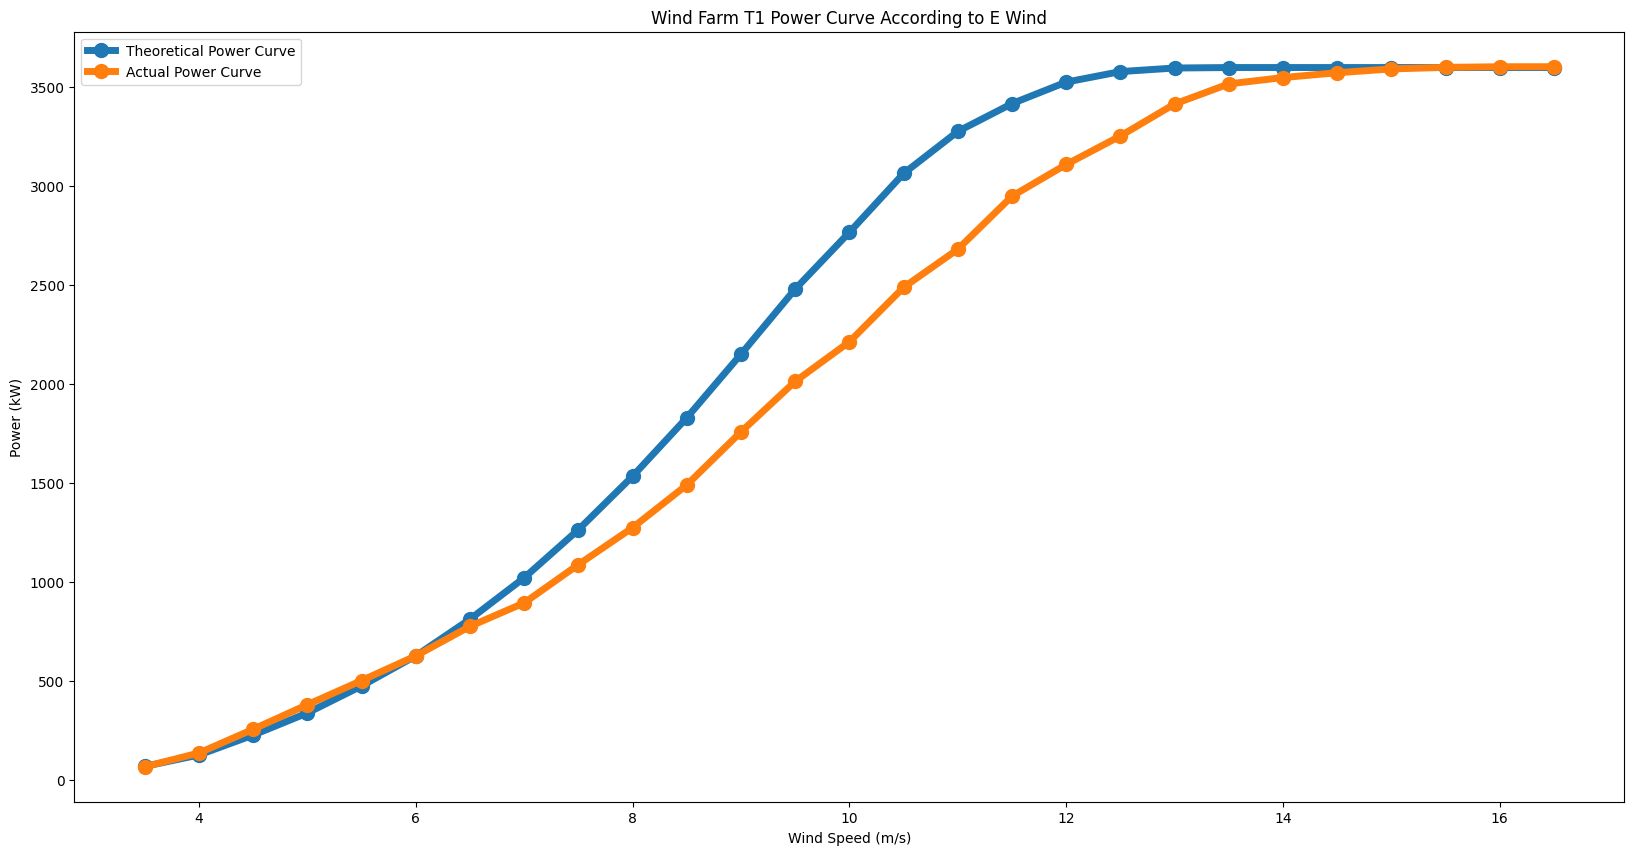

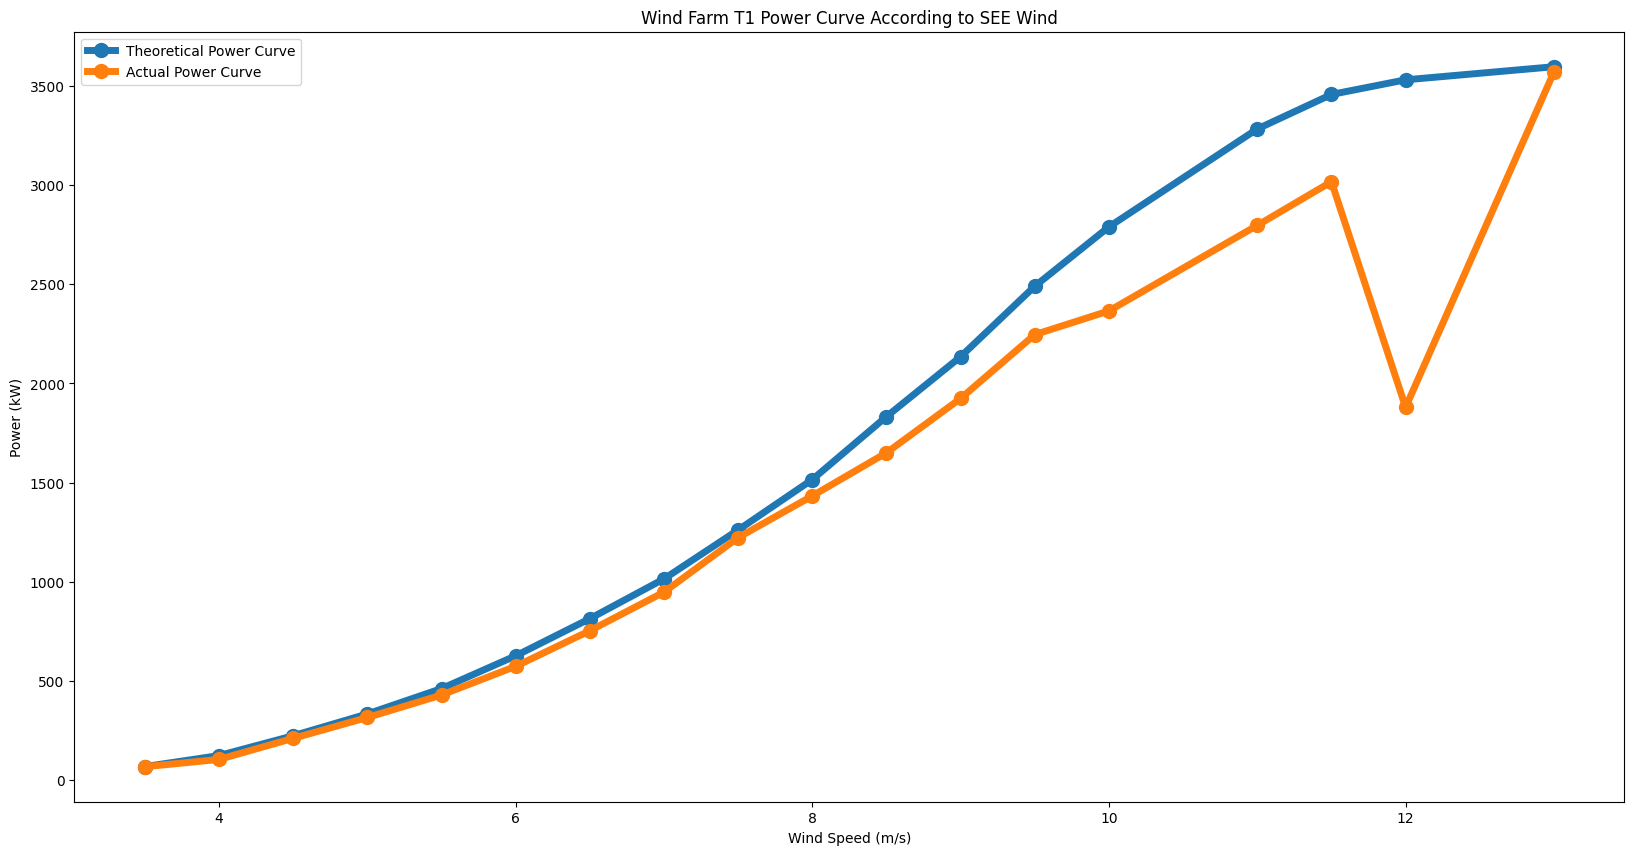

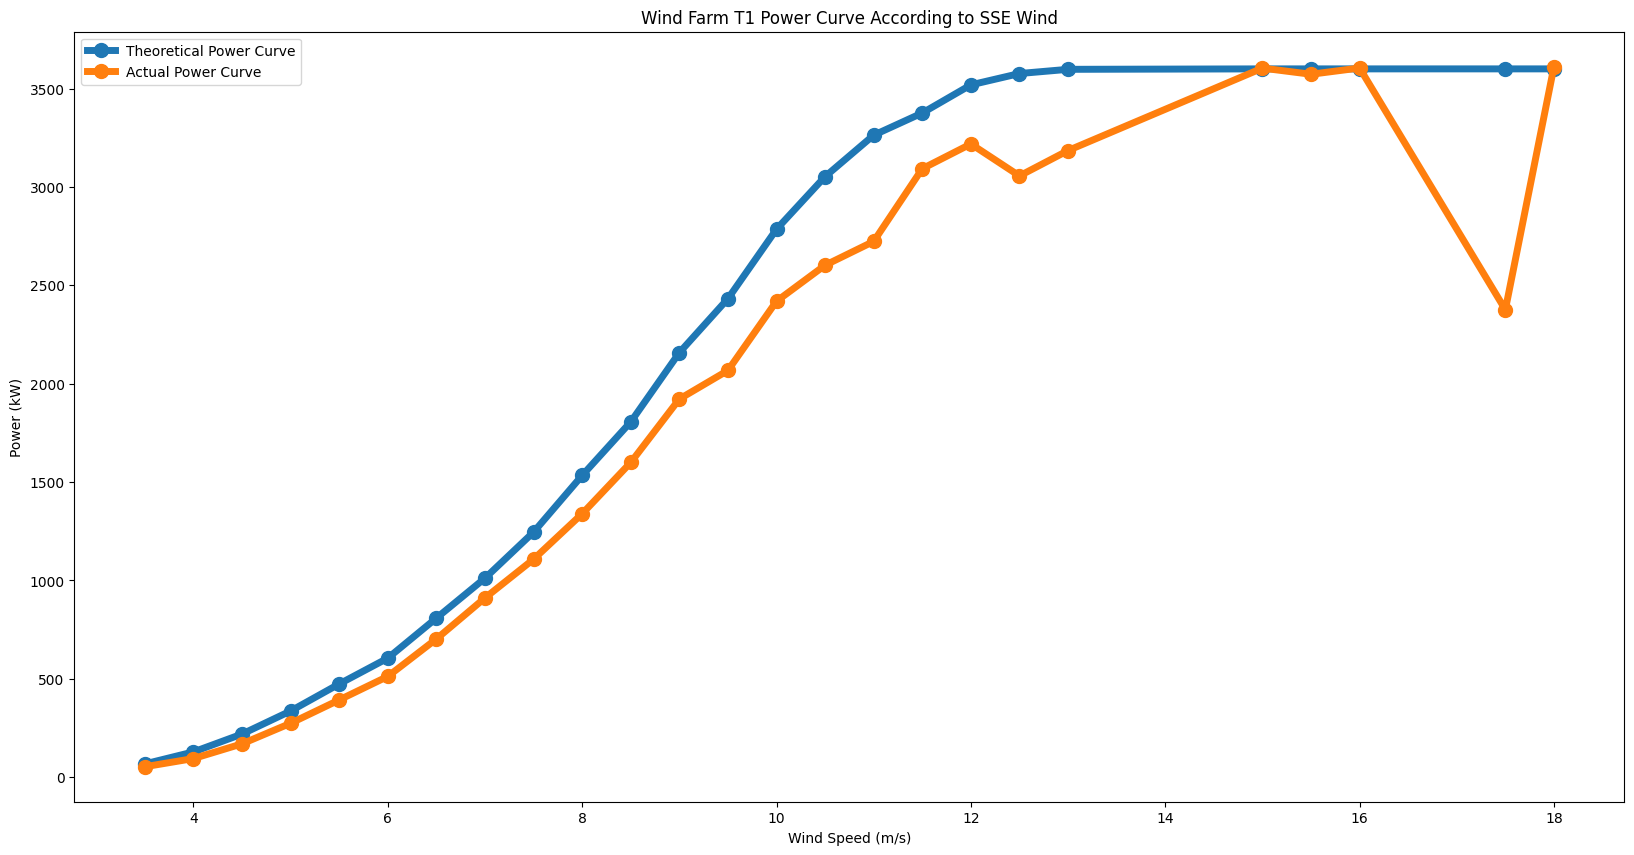

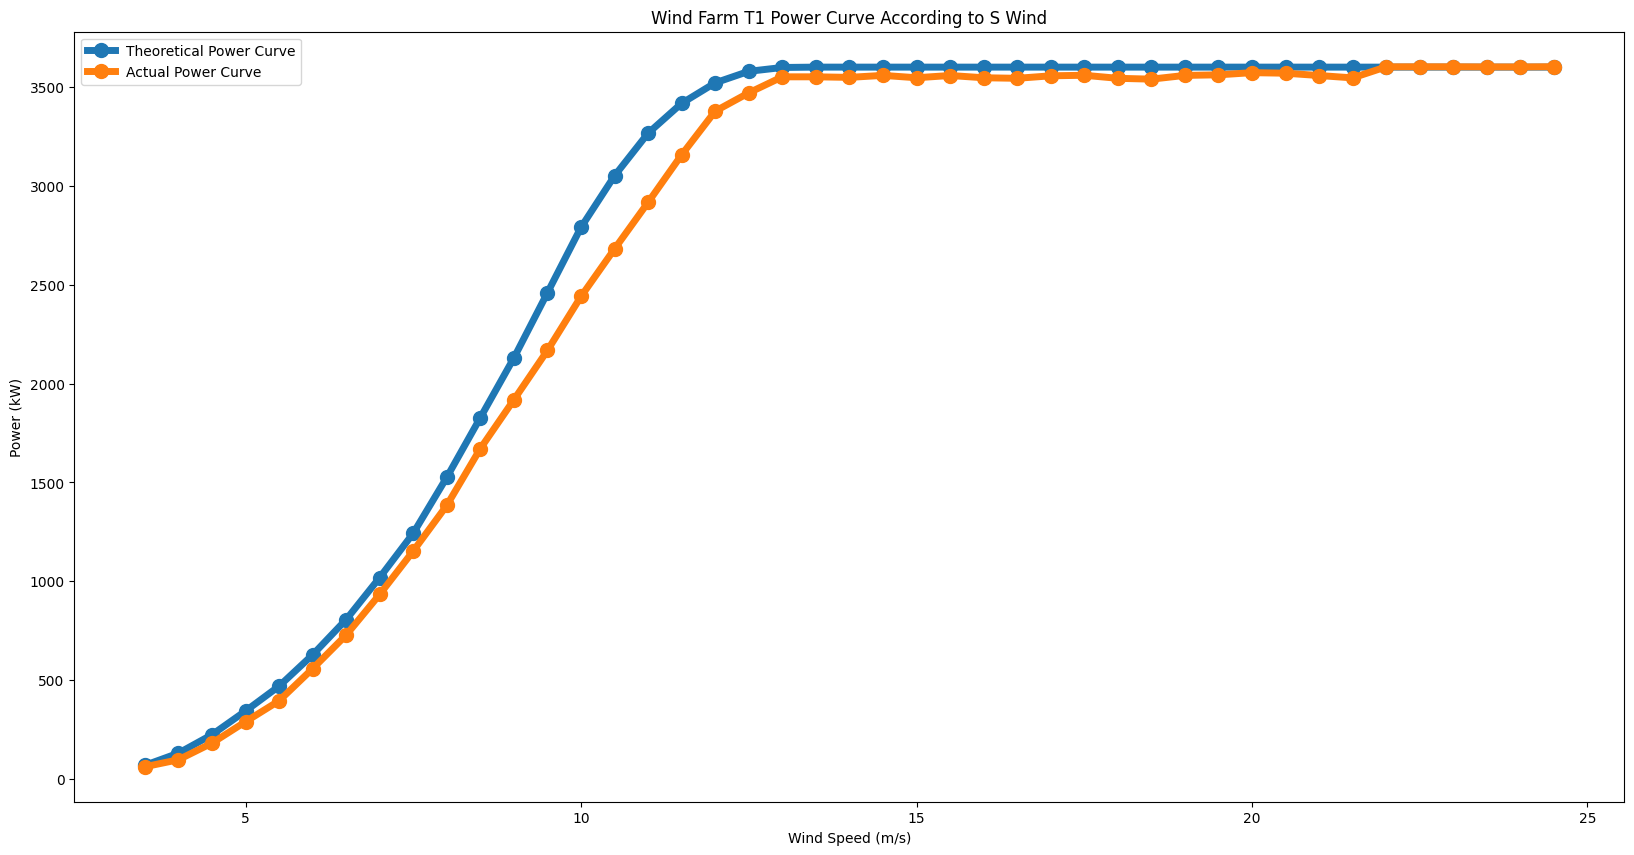

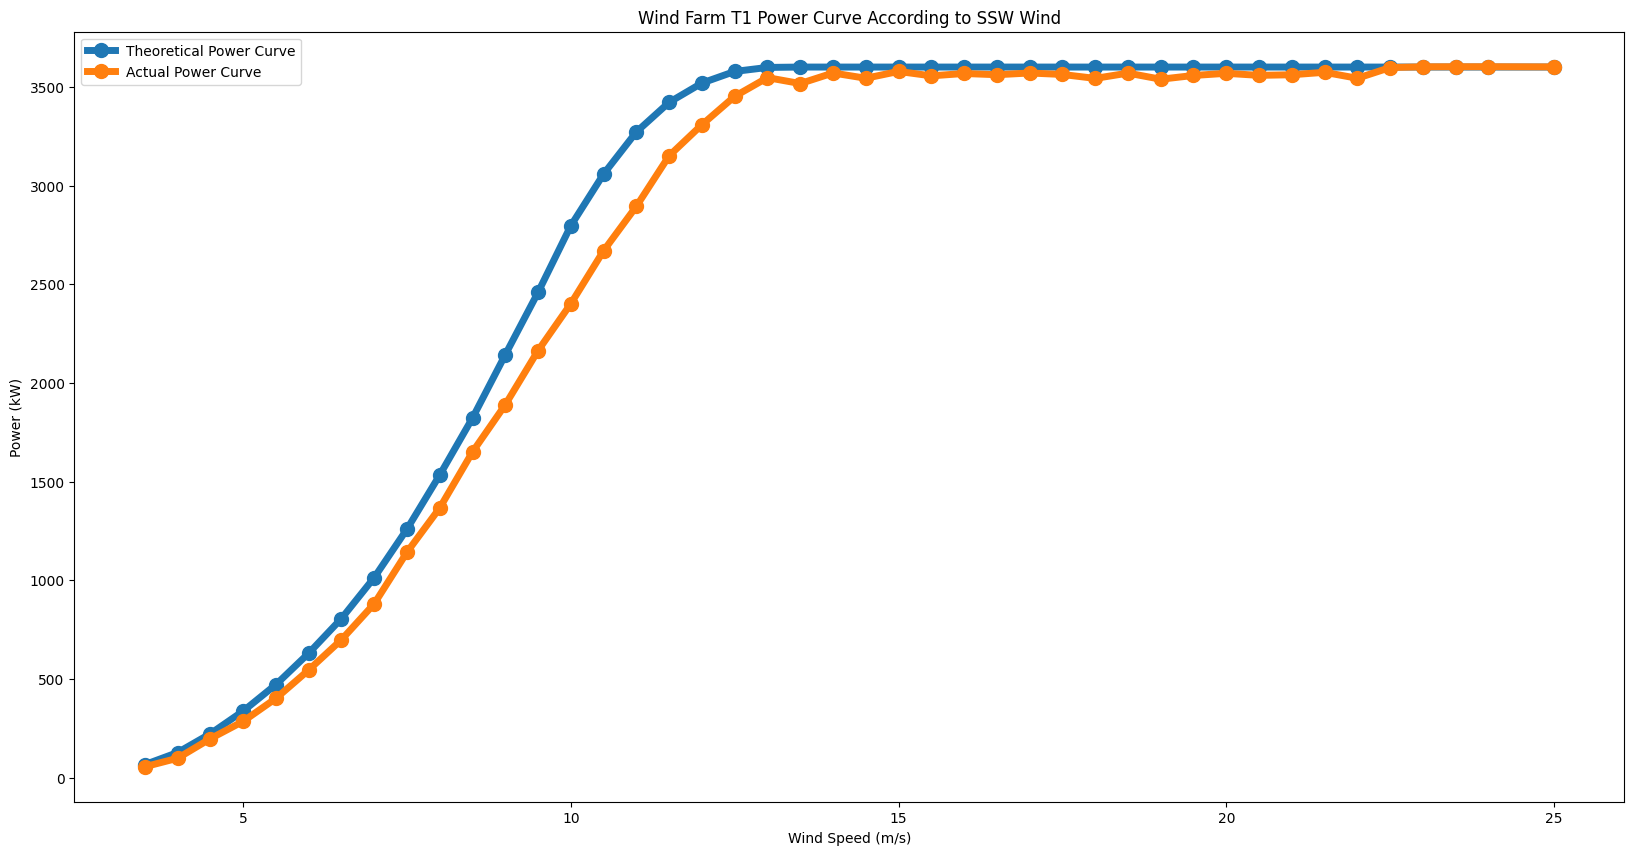

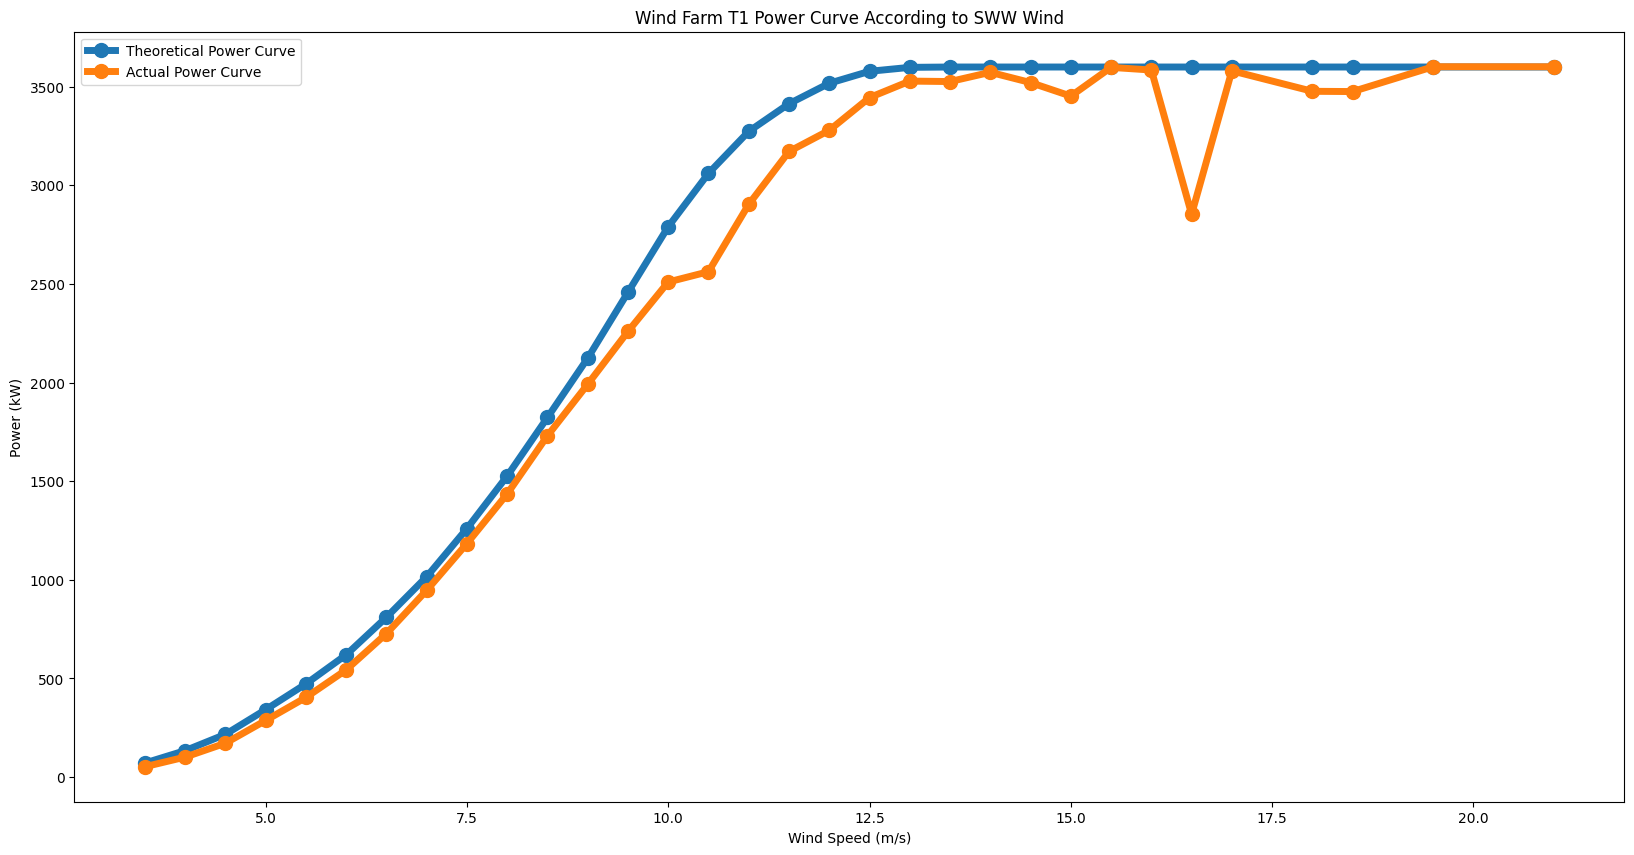

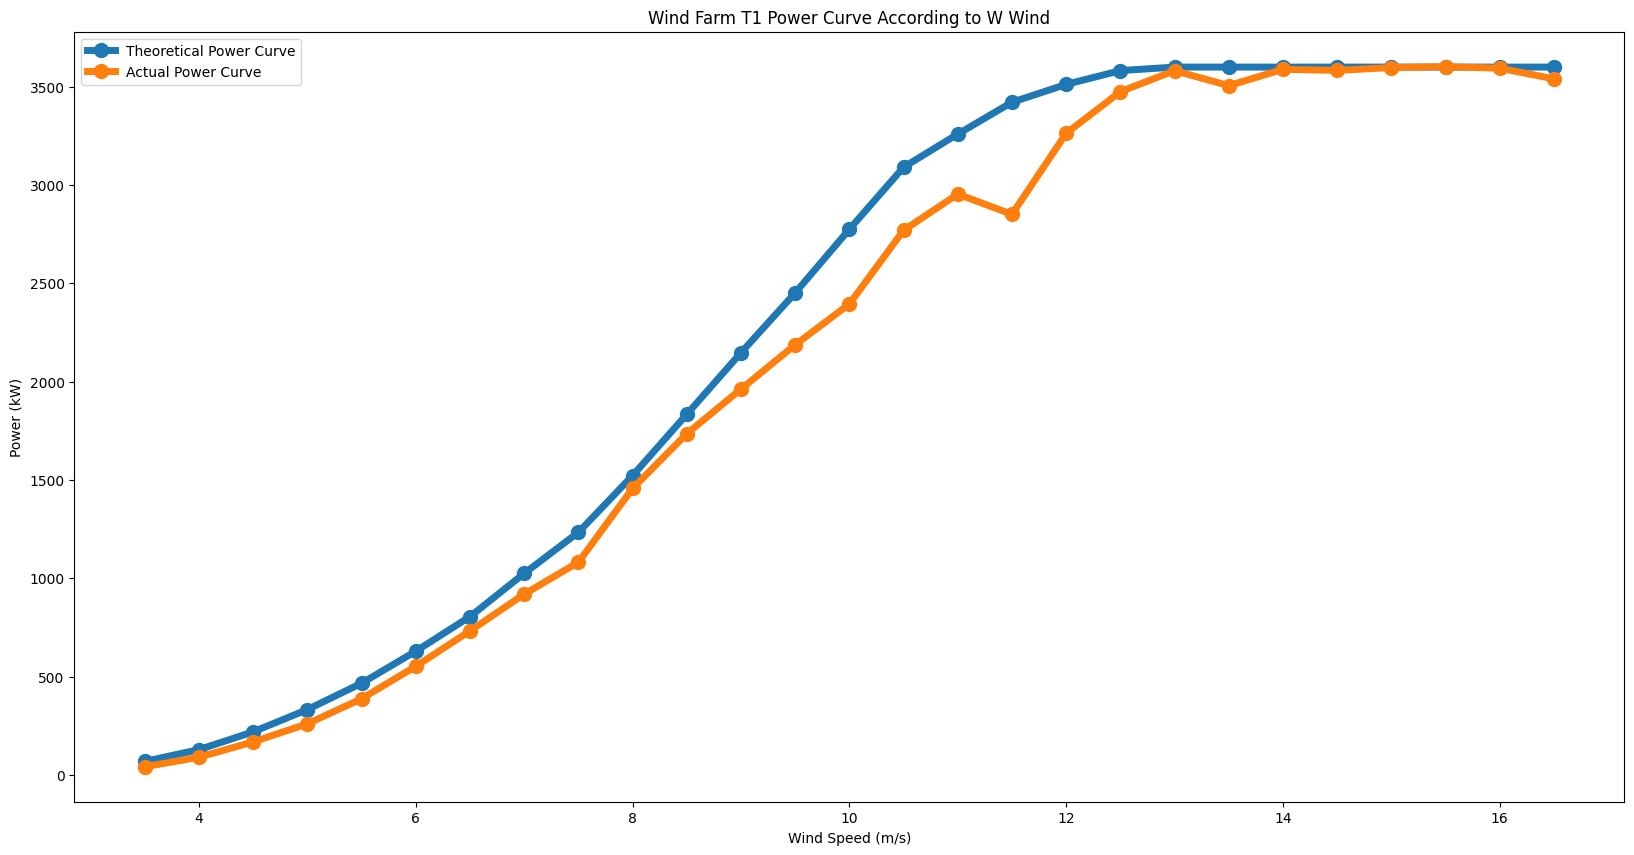

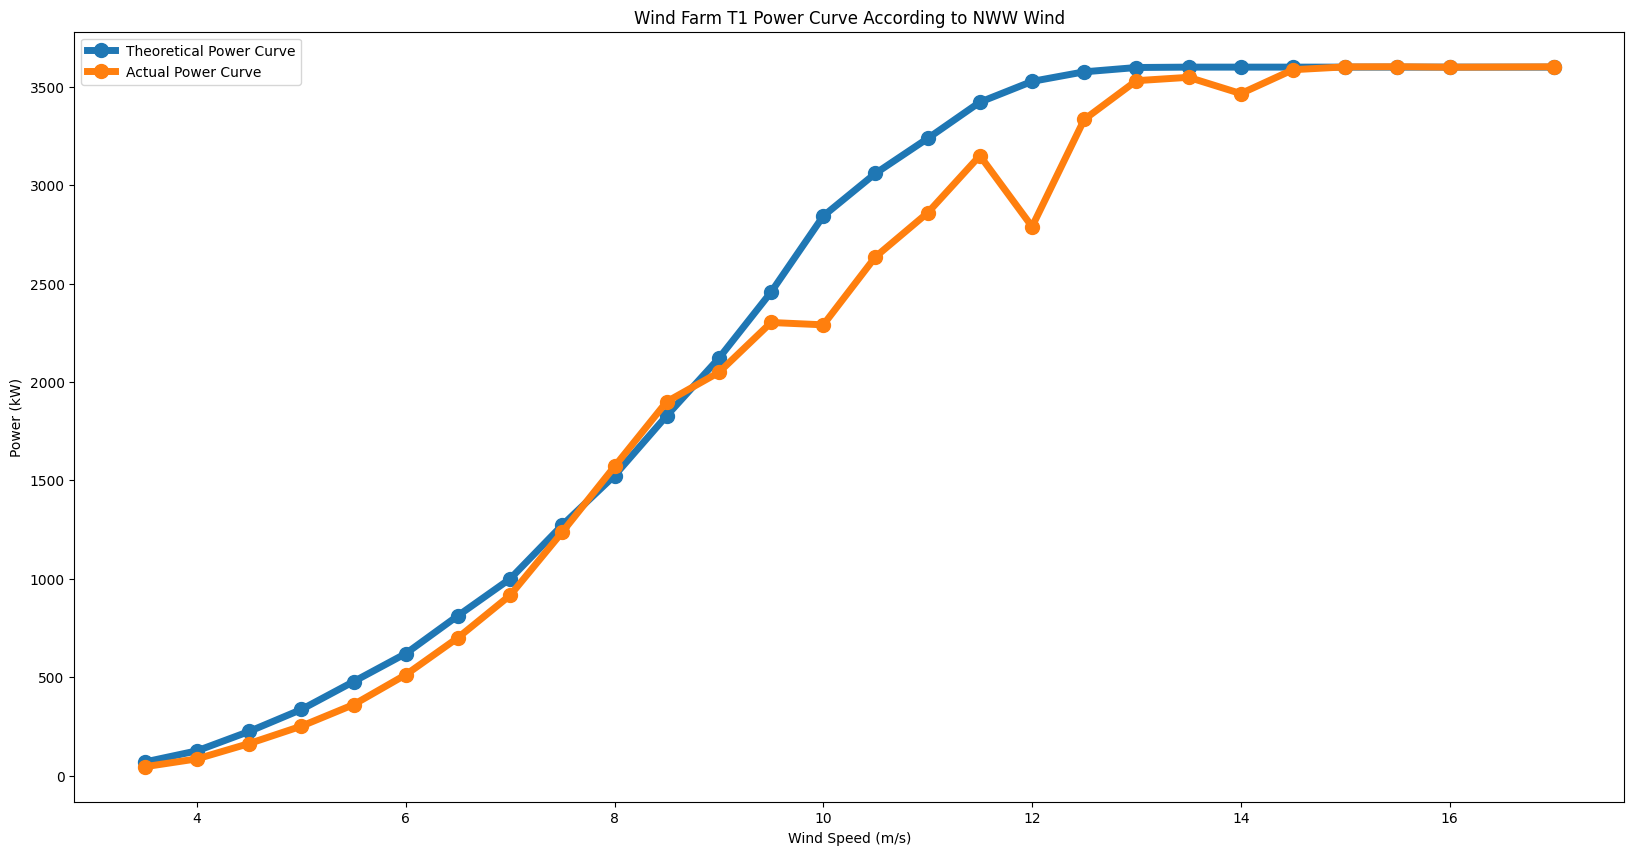

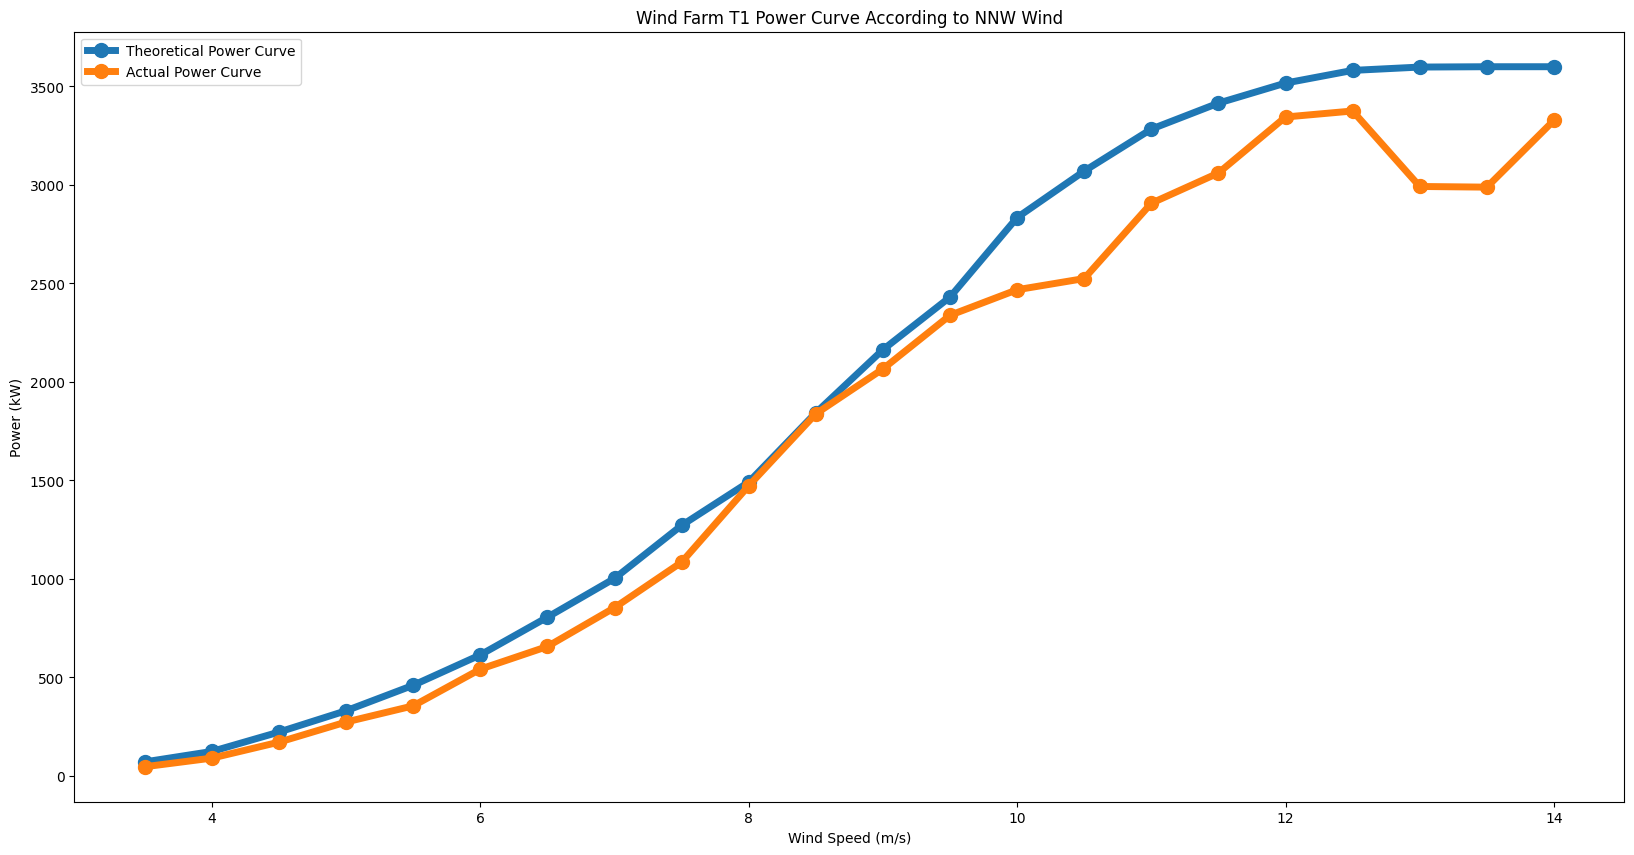

In [51]:
#Drawing power curve of the turbine for all directions.
list_table=[data_T_N,data_T_NNE,data_T_NEE,data_T_E,data_T_SEE,data_T_SSE,data_T_S,
            data_T_SSW,data_T_SWW,data_T_W,data_T_NWW,data_T_NNW]

list_tableName=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]

def graph_T(i):
    fig = plt.figure(figsize=(20,10))  
    plt.plot(list_table[i]["WindSpeed(m/s)"],list_table[i]["Theoretical_Power_Curve (KWh)"],label="Theoretical Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.plot(list_table[i]["WindSpeed(m/s)"],list_table[i]["ActivePower(kW)"],label="Actual Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.xlabel("Wind Speed (m/s)")
    plt.ylabel("Power (kW)")
    plt.title("Wind Farm {} Power Curve According to {} Wind".format(turbine_no,list_tableName[i]))
    plt.legend()
    plt.show()
    fig.savefig("{}_{}_Powercurve.jpeg".format(turbine_no,list_tableName[i]))
    plt.close(fig)

# "N"=0, "NNE"=1,"NEE"=2,"E"=3,"SEE"=4,"SSE"=5,"S"=6,"SSW"=7,"SWW"=8,"W"=9,"NWW"=10,"NNW"=11

for i in range(0,12):
    graph_T(i)

<ipython-input-54-9f4f4feae241>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset.iloc[:,i+1], shade=True)
<ipython-input-54-9f4f4feae241>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset.iloc[:,i+1], shade=True)
<ipython-input-54-9f4f4feae241>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset.iloc[:,i+1], shade=True)
<ipython-input-54-9f4f4feae241>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset.iloc[:,i+1], shade=True)


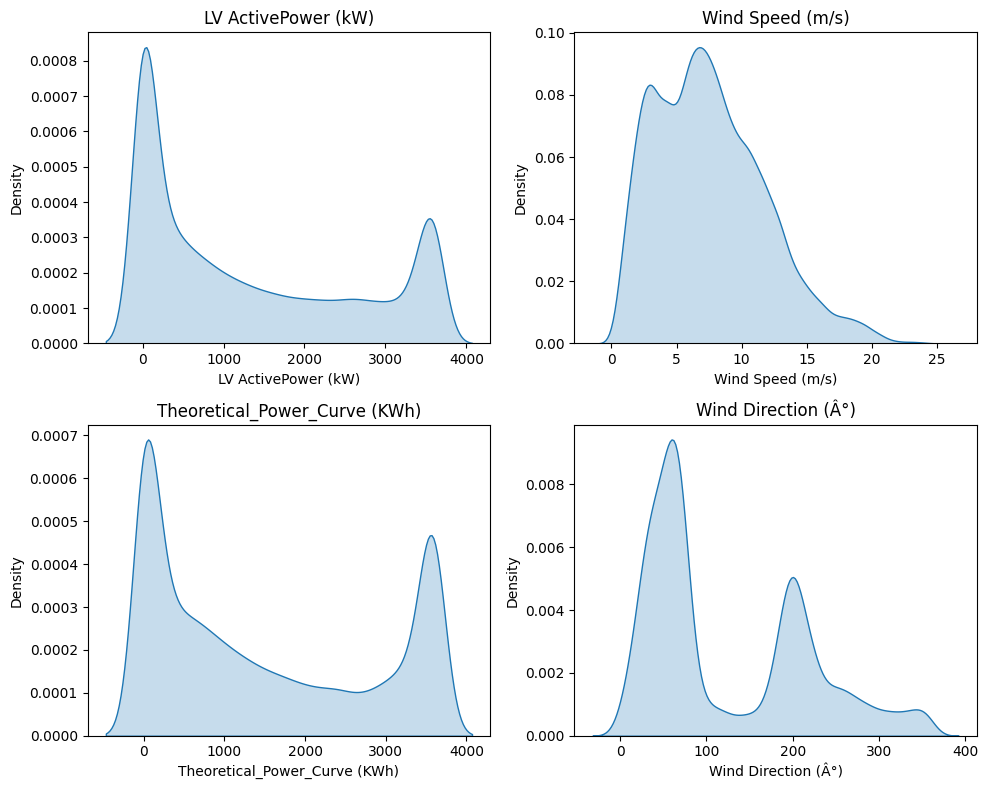

In [54]:
#plotting the data distribution
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(dataset.iloc[:,i+1], shade=True)
    plt.title(dataset.columns[i+1])
plt.tight_layout()
plt.show()

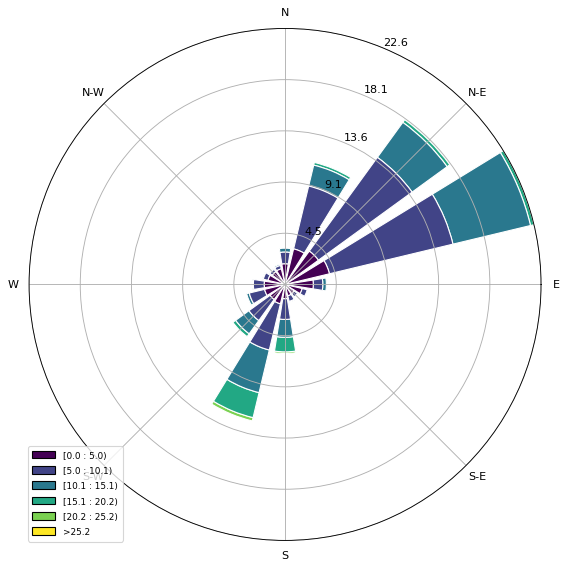

In [57]:
ax = WindroseAxes.from_ax()
ax.bar(dataset['Wind Direction (Â°)'], dataset['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()

##Energy Prediction

In [58]:
import datetime
import time

In [60]:
data=pd.read_csv('/T1.csv')
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [61]:
data.rename(columns={'Theoretical_Power_Curve (KWh)':'Power','LV ActivePower (kW)':'ActivePower',"Wind Speed (m/s)":"WindSpeed","Wind Direction (°)":"WindDirection"},
                inplace=True)
data.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [62]:
data['Time']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[4])
data.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,0
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,10
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,20
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,30
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,40


In [63]:
temp=data['Time'][1:].values - data['Time'][0:-1].values
temp=np.array([0]+list(temp))

In [64]:
data['TimeDiff']=temp

In [65]:
data.tail()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724,10,10
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599,20,10
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500,30,10
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913,40,10
50529,31 12 2018 23:50,2820.466064,9.979332,2779.184096,82.274620,50,10


In [66]:
data['Gust']=np.array([0]+list(data['WindSpeed'][1:].values-data['WindSpeed'][:-1].values))
data.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff,Gust
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,0,0,0.000000
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,10,10,0.360831
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,20,10,-0.456130
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,30,10,0.443637
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,40,10,-0.081733


In [67]:
data.dtypes

Date/Time         object
ActivePower      float64
WindSpeed        float64
Power            float64
WindDirection    float64
Time               int64
TimeDiff           int64
Gust             float64
dtype: object

In [74]:
data_=data[data['TimeDiff'].isin([10,-50])]
data_.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff,Gust
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,10,10,0.360831
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,20,10,-0.456130
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,30,10,0.443637
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,40,10,-0.081733
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,50,10,0.026111


In [75]:
len(data)

50530

In [69]:
len(data_)

50500

In [70]:
data_=data_[data_['ActivePower']>=0]
data_.describe()

,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff,Gust
count,50443.000000,50443.000000,50443.000000,50443.000000,50443.000000,50443.000000,50443.000000
mean,1309.932554,7.565593,1494.454238,123.716485,24.997125,-0.002181,0.001787
std,1312.471586,4.226063,1367.906548,93.425141,17.078962,22.362852,0.742791
min,0.000000,0.000000,0.000000,0.000000,0.000000,-50.000000,-14.075440
25%,53.512621,4.212597,163.517562,49.344398,10.000000,10.000000,-0.380538
50%,828.896973,7.114135,1068.206544,73.689552,20.000000,10.000000,0.001451
75%,2485.947510,10.307985,2969.201056,201.697906,40.000000,10.000000,0.379923
max,3618.732910,25.206011,3600.000000,359.997589,50.000000,10.000000,17.411289


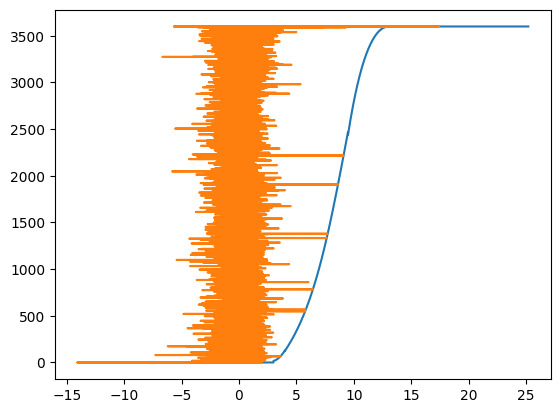

In [77]:
x=data_.sort_values(by='WindSpeed')['WindSpeed']
y=data_.sort_values(by='WindSpeed')['Power']
z=data_.sort_values(by='WindSpeed')['Gust']

plt.plot(x,y)
plt.plot(z,y)

In [78]:
x_train=data_[['WindSpeed','WindDirection','Gust']].values
y_train=data_['ActivePower'].values

## Training

In [80]:
!pip install catboost
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, StackingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [81]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=15).get_n_splits(data_.values)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [82]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.5))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score


Lasso score: 532.3978 (166.1532)



array([837.86521856, 438.63030101, 350.3602913 , 483.25814639,
       551.87487414])

In [83]:
HistGB=HistGradientBoostingRegressor(learning_rate=0.18,max_iter=100,max_leaf_nodes=4)

score = rmsle_cv(HistGB)
print("Hist Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score

Hist Gradient Boosting score: 397.3030 (193.2433)



array([705.88174443, 267.76179295, 210.34965548, 260.31723389,
       542.20463329])

In [84]:
KNR=KNeighborsRegressor(n_neighbors=8, weights='uniform', algorithm='auto', leaf_size=100, p=1, metric='minkowski')

score = rmsle_cv(KNR)
print("KNR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score

KNR score: 431.9098 (180.1452)



array([717.04245203, 294.14832403, 250.77423762, 329.20424892,
       568.3799131 ])

In [85]:
model_xgb1 = xgb.XGBRegressor(learning_rate=2e-2, max_depth=4, 
                             min_child_weight=1.1, n_estimators=100,
                             reg_alpha=0.3, reg_lambda=0.7,
                             #subsample=0.5213, silent=1,
                             nthread = -1)

In [86]:
model_xgb1.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=1.1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, nthread=-1, num_parallel_tree=None,
             predictor=None, ...)

In [87]:
preds=model_xgb1.predict(x_train)
score=mean_squared_error(y_train,preds)
score**0.5

449.98280381709486

In [88]:
r2_score(y_train,preds)

0.8824499500649879

In [89]:
model_xgb1.predict(np.array([6.02,110.0,0.23]).reshape(1,-1))


array([454.6527], dtype=float32)

In [90]:
model_lgb1 = lgb.LGBMRegressor(objective='regression',num_leaves=2,
                              learning_rate=0.07, n_estimators=80,
                              #max_bin = 255, bagging_fraction = 0.8,
                              #bagging_freq = 5, feature_fraction = 0.8,
                              #feature_fraction_seed=9, bagging_seed=9,
                              reg_alpha=0.3,reg_lambda=0.7,
                              #min_data_in_leaf =3, min_sum_hessian_in_leaf = 2
                             )

In [91]:
model_lgb1.fit(x_train,y_train)


LGBMRegressor(learning_rate=0.07, n_estimators=80, num_leaves=2,
              objective='regression', reg_alpha=0.3, reg_lambda=0.7)

In [92]:
preds=model_lgb1.predict(x_train)
score=mean_squared_error(y_train,preds)
score**0.5

391.77644901945024

In [93]:
r2_score(y_train,preds)


0.9108938593081567

In [94]:
model_lgb1.predict(np.array([6.02,110.0,0.23]).reshape(1,-1))


array([536.88808499])

## Testing